# Exercise 1

In this question we can review results from the re-analysis of some publically available RNA-seq data.

The data we use is from the Encode consortium, Experiments ENCSR297UBP (GM12878 cell line) and ENCSR552EGO (HeLa cell lines)

The data is part of the Encode project and so more information can be found at the Encode portal.

I have already created a table of differentially expressed genes between GM12878 and HeLa and a table of gene expression values for all samples which you can find in directory DE_Genes.

Differential Expression Table - **DE_Genes/GM12878_Minus_HeLa_DEG.csv**

Absolute Expression Table - **DE_Genes/Expression.csv**


## Question 1:
Read in the differential expression table and produce a data.frame of all results. How many genes have a padj < 0.05.

In [1]:
getwd()

[1] "/data/BioInf2018CourseWork"

In [2]:
DEdata <- read.csv(file = "DE_Genes/GM12878_Minus_HeLa_DEG.csv")
colnames(DEdata)

[1] "ID"             "Symbol"         "baseMean"       "log2FoldChange"
[5] "lfcSE"          "stat"           "pvalue"         "padj"

In [3]:
nrow(DEdata[DEdata$padj < .05,])

[1] 4719

## Question 2:
Now with these genes with a padj < 0.05, create a scatter plot (as seen below) of -log10 pvalues on Y axis and log2FoldChange on X axis using ggplot2.

In [4]:
library(ggplot2)

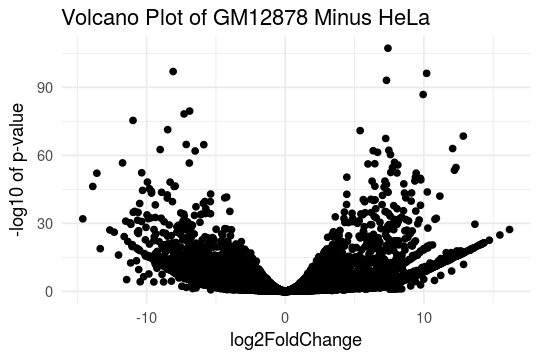

In [5]:
options(repr.plot.width=4.5, repr.plot.height=3)
q2plot <- ggplot(DEdata, aes(x=log2FoldChange, y = -log10(pvalue))) +
            geom_point() +
            ylab("-log10 of p-value")+
            ggtitle("Volcano Plot of GM12878 Minus HeLa") +
            theme_minimal()
q2plot

## Question 3:
Read in the absolute expression table, add 1 to every value in table and make a boxplot of log10 expression values for all samples.

In [6]:
absdata <- read.csv(file = "DE_Genes/Expression.csv", row.names=1)
colnames(absdata)

[1] "GM12878_1" "GM12878_2" "HeLa_1"    "HeLa_2"

In [7]:
absdata <- absdata + 1

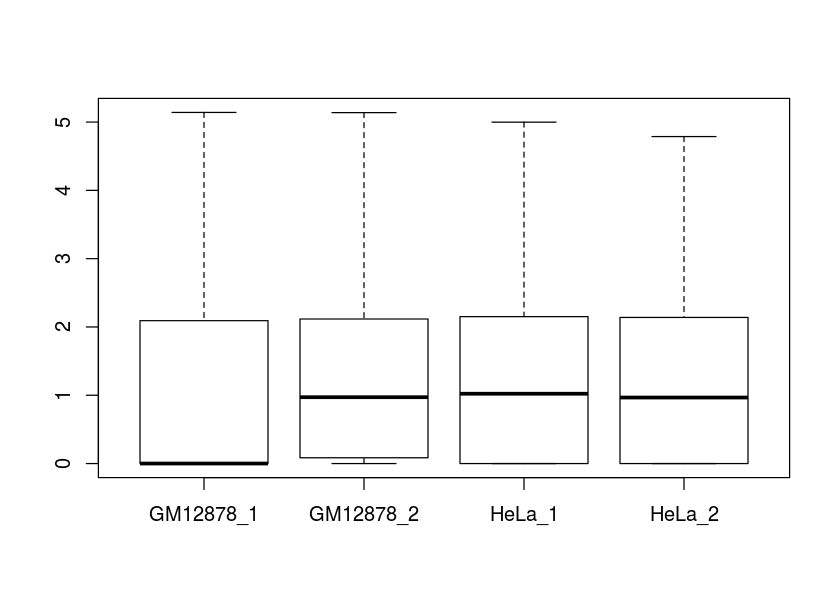

In [8]:
options(repr.plot.width=7, repr.plot.height=5)
boxplot(log10(absdata))

## Question 4:
Now create a similar boxplot with just genes that have a padj < 0.05 and a log2FoldChange > 1.

In [9]:
tgtIDs <- DEdata[(DEdata$padj < .05) & (DEdata$log2FoldChange > 1) ,"ID"]

In [10]:
tgtdata <- absdata[rownames(absdata) %in% tgtIDs , ]

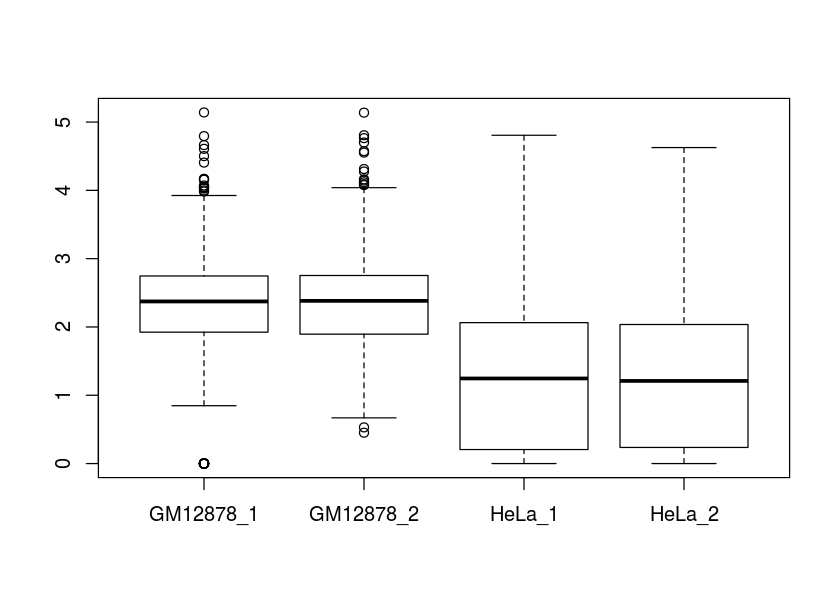

In [11]:
options(repr.plot.width=7, repr.plot.height=5)
boxplot(log10(tgtdata))

## Question 5: 
Using the absolute expression table, identify the genes whose expression is in the top 60%. Filter the results from the differential expression table to these results and plot the log2 basemean on X and log2FoldChange on Y. Highlight genes who have padj < 0.05

*Note - "expression in the top 60%" is somewhat ambiguous, as there are 4 datasets in the absolute expression table. I interpret it as the **union** of the top 60% of each dataset*

In [12]:
# define the quantile thresholds
t1 <- quantile(absdata$GM12878_1, probs = .6, names = FALSE)
t2 <- quantile(absdata$GM12878_2, probs = .6, names = FALSE)
t3 <- quantile(absdata$HeLa_1, probs = .6, names = FALSE)
t4 <- quantile(absdata$HeLa_2, probs = .6, names = FALSE)

In [13]:
# get the IDs (rownames here)
top60IDs <- rownames(absdata[(absdata$GM12878_1 > t1) | (absdata$GM12878_2 > t2) 
        | (absdata$HeLa_1 > t3) | (absdata$HeLa_2 > t4)  , ])

In [14]:
# filter the DEdata by ID column from above
top60data <- DEdata[DEdata$ID %in% top60IDs , ]

In [15]:
# define a new column 'sig'
top60data$sig <- top60data$padj < .05

In [16]:
colnames(top60data)

[1] "ID"             "Symbol"         "baseMean"       "log2FoldChange"
[5] "lfcSE"          "stat"           "pvalue"         "padj"          
[9] "sig"

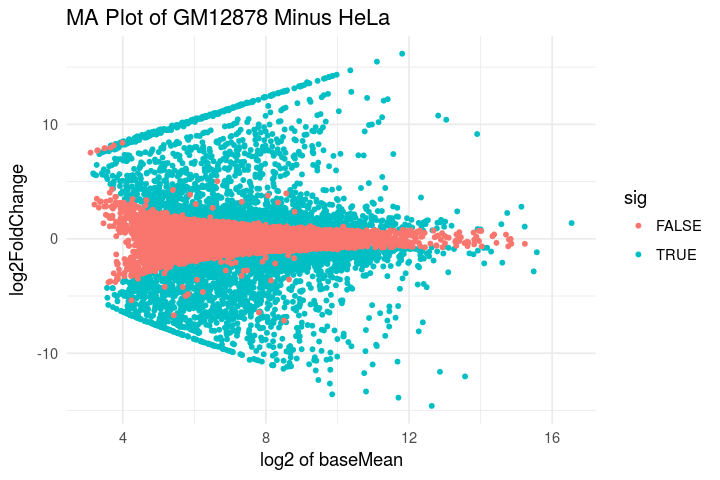

In [17]:
options(repr.plot.width=6, repr.plot.height=4)
q5plot <- ggplot(top60data, aes(x=log2(baseMean), y = log2FoldChange, color=sig)) +
            geom_point(size=1) +
            xlab("log2 of baseMean")+
            ggtitle("MA Plot of GM12878 Minus HeLa") +
            theme_minimal()
q5plot